In [12]:
#conda install -c conda-forge jieba

In [13]:
import jieba
import math
import matplotlib.pyplot as plt

In [14]:
def jieba_cal():
    f = open('hw1-dataset.txt', 'r', encoding = 'utf8')
    result = []
    while True:
        text = f.readline().replace("\t"," ").replace("\n","")
        if not text:
            break
        sentence = jieba.lcut(text,cut_all=False)
        filter(None, sentence)
        result.append(sentence)
    f.close()
    return result

In [15]:
def cal_single_sentence(word_list):     #
    word_freq_list = []
    word_list_len = len(word_list)
    
    for i in range(0,word_list_len):
        word_freq = dict()
        for j in range(0,len(word_list[i])):
            if(word_list[i][j] != " " and word_list[i][j] not in word_freq):
                count = word_list[i].count(word_list[i][j])
                word_freq[word_list[i][j]] = count
        word_freq_list.append(word_freq)
        
    return word_freq_list

In [16]:
def cal_all_word_num(word_list):         #
    count_list = []
        
    for i in range(0,len(word_list)):
        count_list.append(len(word_list[i]))

    return count_list

In [18]:
def tf_algorithm(word_freq_list, count_list): #
    freq_list = []
    length = len(word_freq_list)
    
    for i in range(0, length):
        temp = dict()
        for key, value in word_freq_list[i].items():
            temp[key] = (value / count_list[i])
        freq_list.append(temp)
        
    return freq_list

In [19]:
def idf_algorithm(word_freq_list):  #

    length = len(word_freq_list) #
    all_word = []
    ifd_dict = dict()
    temp = dict()
    
    for i in range(0, length):
        all_word.extend(word_freq_list[i])
    
    for word in all_word:
        if temp.__contains__(word) != True:
            temp[word] = 1
        else:
            temp[word] += 1 
    
    for key, value in temp.items():
        ifd_dict[key] = math.log(length/value,10)
    
    return ifd_dict

In [20]:
def tfidf_algorithm(tf_num,idf_num): #
    tfidf_num = []

    for i in range(0,len(tf_num)):
        temp = dict()
        for key,value in tf_num[i].items():
            temp[key] = value * idf_num[key]
        tfidf_num.append(temp)
    
    return tfidf_num

In [21]:
def select_data(data):
    temp = dict()
    max_dict = dict()
    for i in range(0, len(data)):
        max_price = max(zip(data[i].values(), data[i].keys()))
        temp[max_price[1]] = max_price[0]
    
    for i in range(0, 100):
        max_price = max(zip(temp.values(), temp.keys()))
        max_dict[max_price[1]] = max_price[0]
        del temp[max_price[1]]
         
    return max_dict  

In [22]:
def make_picture(result):
    xpt = []
    ypt = []
    i = 0
    for x,y in result.items():
        print(i, ":", x)
        xpt.append(i)
        ypt.append(y)
        i += 1
        
    plt.plot(xpt,ypt)
    plt.show()

In [23]:
def main():
    article_list = jieba_cal()
    single_word_freq = cal_single_sentence(article_list)
    count_list = cal_all_word_num(single_word_freq)
    
    tf_num = tf_algorithm(single_word_freq, count_list)
    idf_num = idf_algorithm(single_word_freq)
    tfidf_num = tfidf_algorithm(tf_num,idf_num)

    result_list1 = select_data(tfidf_num)
    result_list2 = select_data(tf_num)
    
    make_picture(result_list1)
    make_picture(result_list2)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\diabl\AppData\Local\Temp\jieba.cache
Loading model cost 0.651 seconds.
Prefix dict has been built successfully.


0 : 嘻嘻
1 : 無理
2 : 反田
3 : 簽拉
4 : ﹎
5 : ∷
6 : 呯
7 : 吖
8 : Da
9 : 皮豆
10 : 國國國
11 : 小號
12 : ︹
13 : 輝輝輝
14 : 狗馬子
15 : 〩
16 : OLA
17 : KERO
18 : あ
19 : 估摸
20 : 密集
21 : 木頭
22 : ～
23 : 額額
24 : bye
25 : 鞥
26 : Burn
27 : 羽彩
28 : ☁
29 : 欸
30 : ｗ
31 : 社
32 : 嘟嚕
33 : ■
34 : 艦艦
35 : 男大優
36 : yogurt
37 : 幫幫
38 : 自犬
39 : 謝來
40 : 董滋
41 : Pinky
42 : 發發
43 : 惹
44 : 一片
45 : 駄
46 : 191
47 : 妖尼哥
48 : 哈連雞
49 : 無駝
50 : 口喜
51 : 露露
52 : 身寸
53 : た
54 : ﶝ
55 : 小工
56 : try
57 : 推推
58 : 懂資
59 : 先先
60 : 蘇偉
61 : 開眼頭
62 : 牛媽媽
63 : 戊戌
64 : 張豬
65 : 吉吉覆吉吉
66 : 勞台
67 : wiselike
68 : ratuo
69 : XXXXGGYY
70 : READ
71 : PINKY
72 : Mimimimimimimimimi
73 : BOKU
74 : 88888888888888
75 : 450000
76 : 11111111
77 : ㄇ
78 : 超超
79 : 弌
80 : 扁鵲
81 : 幽
82 : 女勒
83 : derla
84 : ─
85 : 
86 : 快壞
87 : 加布
88 : TK
89 : 北北基
90 : 吹雪
91 : 冫
92 : 桀桀
93 : 歐拉歐
94 : 蔡菜
95 : 糧糧
96 : 烏魯賽
97 : 仔幹妹
98 : 咩
99 : 睡夢中


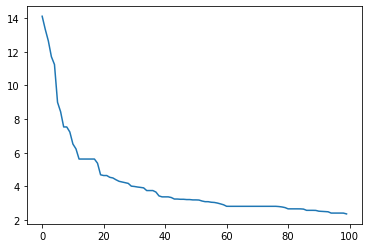

0 : 嘻嘻
1 : 無理
2 : 反田
3 : 簽拉
4 : ﹎
5 : ∷
6 : 國國國
7 : 吖
8 : mi
9 : 小號
10 : あ
11 : 皮豆
12 : 密集
13 : ㄇ
14 : 俗氣
15 : 愛愛
16 : ︹
17 : 輝輝輝
18 : 汪汪
19 : 一片
20 : 一動
21 : 〩
22 : ☎
23 : ☁
24 : bye
25 : OLA
26 : KERO
27 : 鞥
28 : ←
29 : 幫幫
30 : 咩
31 : 咦
32 : 估摸
33 : ■
34 : 額額
35 : Burn
36 : 身寸
37 : 感恩
38 : ｗ
39 : 羽彩
40 : 擅長
41 : 吶吶
42 : 口桀
43 : 發發
44 : GAY
45 : 嘟嚕
46 : 駄
47 : 露露
48 : 贏大錢
49 : 蝦
50 : 艦艦
51 : 自犬
52 : 發大財
53 : 男大優
54 : 氣球
55 : 樹懶
56 : 推推
57 : 小工
58 : 妖怪
59 : 唧唧
60 : ─
61 : yogurt
62 : face
63 : 191
64 : 給他
65 : 天王
66 : 唷
67 : >
68 : ﶝ
69 : 超超
70 : 謝來
71 : 董滋
72 : 無駝
73 : 拉
74 : 塞爾維亞人
75 : 口喜
76 : z
77 : 蘇偉
78 : 紅茶
79 : 無聊
80 : 妖尼哥
81 : try
82 : G
83 : ７
84 : 歐拉歐
85 : 懂資
86 : 弌
87 : ·
88 : 先先
89 : Da
90 : 開窗
91 : 開眼頭
92 : 那女
93 : 臭臭
94 : 腿抽筋
95 : 經國
96 : 絕望
97 : 竹筍
98 : 睡夢中
99 : 相忍


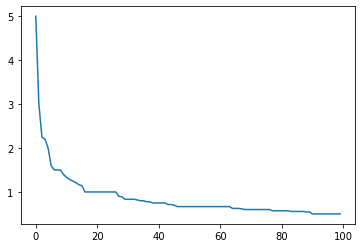

In [24]:
if __name__== "__main__":
    main() 